# Предсказание оценки ученика

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
import numpy as np

In [4]:
from sklearn.model_selection import train_test_split
from category_encoders.target_encoder import TargetEncoder

ModuleNotFoundError: No module named 'category_encoders'

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
sns.set(rc={'figure.figsize': (4, 3)})

In [37]:
data = pd.read_csv('student-mat.csv')

<Axes: xlabel='G3', ylabel='Count'>

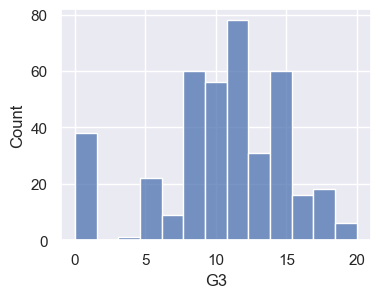

In [38]:
sns.histplot(data['G3'])

In [39]:
data = data[data['G3'] != 0]

data_y = data['G3']
data_x = data.drop(['G3'], axis=1)

    school gender  age address famsize Pstatus  Medu  Fedu      Mjob  \
0       GP      F   18       U     GT3       A     4     4   at_home   
1       GP      F   17       U     GT3       T     1     1   at_home   
2       GP      F   15       U     LE3       T     1     1   at_home   
3       GP      F   15       U     GT3       T     4     2    health   
4       GP      F   16       U     GT3       T     3     3     other   
..     ...    ...  ...     ...     ...     ...   ...   ...       ...   
390     MS      M   20       U     LE3       A     2     2  services   
391     MS      M   17       U     LE3       T     3     1  services   
392     MS      M   21       R     GT3       T     1     1     other   
393     MS      M   18       R     LE3       T     3     2  services   
394     MS      M   19       U     LE3       T     1     1     other   

         Fjob  ... higher internet  romantic  famrel  freetime goout health  \
0     teacher  ...    yes       no        no       4    

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=50)

In [41]:
len(X_train)

307

In [ ]:
len(X_test)

In [ ]:
X_train

In [ ]:
X_y_train = X_train.copy(deep=True)
X_y_train['y'] = y_train

X_y_train.corr(numeric_only=True)   

In [5]:
corr = X_y_train.corr(numeric_only=True)['y']
corr_y = corr[(corr >= 0.1) | (corr <= -0.1)]
corr_y

NameError: name 'X_y_train' is not defined

In [ ]:
sns.histplot(data['G1'])
sns.histplot(data['G3'])

In [6]:
sns.scatterplot(x=data['G1'], y=data['G3'])

NameError: name 'data' is not defined

In [7]:
sns.swarmplot(x=data['age'], y=data['G3'], size=4)

NameError: name 'data' is not defined

## Подготовка факторов

In [8]:
numeric_factors_to_use = ['age', 'traveltime', 'G1', 'studytime', 'Medu', 'Fedu', 'failures']

categorical_columns = ['school', 'gender', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
                       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
                       'higher', 'internet', 'romantic']

In [9]:
X_y_train \
    .groupby('higher', as_index=False) \
    .agg({'y': 'mean'})

NameError: name 'X_y_train' is not defined

In [10]:
interesting_categorical_factors = ['Mjob', 'Fjob', 'schoolsup', 'higher']

In [11]:
Mjob_target_encoder = TargetEncoder()
Mjob_target_encoder.fit(X_y_train['Mjob'], X_y_train['y'])

Fjob_target_encoder = TargetEncoder()
Fjob_target_encoder.fit(X_y_train['Fjob'], X_y_train['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_train['schoolsup'], X_y_train['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_train['higher'], X_y_train['y'])

NameError: name 'TargetEncoder' is not defined

In [12]:
X_y_train['Mjob_encoded'] = Mjob_target_encoder.transform(X_y_train['Mjob'])

X_y_train['Fjob_encoded'] = Fjob_target_encoder.transform(X_y_train['Fjob'])

X_y_train['schoolsup_encoded'] =schoolsup_target_encoder.transform(X_y_train['schoolsup'])

X_y_train['higher_encoded'] = higher_target_encoder.transform(X_y_train['higher'])

NameError: name 'Mjob_target_encoder' is not defined

In [13]:
X_y_train

NameError: name 'X_y_train' is not defined

In [14]:
encoded_factors = ['Mjob_encoded', 'Fjob_encoded', 'schoolsup_encoded', 'higher_encoded']
needed_factors = numeric_factors_to_use + encoded_factors

In [15]:
X_train_encoded = X_y_train.copy(deep=True)

NameError: name 'X_y_train' is not defined

In [16]:
X_train_encoded = X_train_encoded[needed_factors]

NameError: name 'X_train_encoded' is not defined

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

scaler.fit(X_train_encoded)

X_train_scaled = scaler.transform(X_train_encoded)

NameError: name 'X_train_encoded' is not defined

In [19]:
X_train_scaled

NameError: name 'X_train_scaled' is not defined

X_train_encoded

## Создание модели

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [21]:
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))

NameError: name 'X_train_scaled' is not defined

## Тест модели

In [22]:
X_y_test = X_test.copy(deep=True)
X_y_test['y'] = y_test

NameError: name 'X_test' is not defined

In [23]:
X_y_test

NameError: name 'X_y_test' is not defined

In [24]:
Mjob_target_encoder = TargetEncoder()
Mjob_target_encoder.fit(X_y_test['Mjob'], X_y_test['y'])

Fjob_target_encoder = TargetEncoder()
Fjob_target_encoder.fit(X_y_test['Fjob'], X_y_test['y'])

schoolsup_target_encoder = TargetEncoder()
schoolsup_target_encoder.fit(X_y_test['schoolsup'], X_y_test['y'])

higher_target_encoder = TargetEncoder()
higher_target_encoder.fit(X_y_test['higher'], X_y_test['y'])

NameError: name 'TargetEncoder' is not defined

In [25]:
X_y_test['Mjob_encoded'] = Mjob_target_encoder.transform(X_y_test['Mjob'])

X_y_test['Fjob_encoded'] = Fjob_target_encoder.transform(X_y_test['Fjob'])

X_y_test['schoolsup_encoded'] =schoolsup_target_encoder.transform(X_y_test['schoolsup'])

X_y_test['higher_encoded'] = higher_target_encoder.transform(X_y_test['higher'])

NameError: name 'Mjob_target_encoder' is not defined

In [26]:
X_y_test

NameError: name 'X_y_test' is not defined

In [27]:
X_test_encoded = X_y_test.copy(deep=True)
X_test_encoded = X_test_encoded[needed_factors]

NameError: name 'X_y_test' is not defined

In [ ]:
X_test_encoded

In [28]:
scaler = MinMaxScaler()

scaler.fit(X_test_encoded)

X_test_scaled = scaler.transform(X_test_encoded)

NameError: name 'X_test_encoded' is not defined

In [29]:
X_test_scaled

NameError: name 'X_test_scaled' is not defined

In [30]:
print(model.score(X_test_scaled, y_test))


predictions = model.predict(X_test_scaled)

NameError: name 'X_test_scaled' is not defined

## Оценка качества


In [31]:
import random
from math import floor

In [32]:
def cut_on_edges(l, fraction_to_cut):
    to_cut = floor(len(l) * fraction_to_cut)
    return l[to_cut:len(l) - to_cut]

In [33]:
def bootstrap_confidence_interval_solution(y, y_pred, fraction_to_cut):
    bs_y_and_y_pred = list(zip(y, y_pred))
    bs_interval = []
    
    for n in range(10_000):
        bs_sample = random.choices(bs_y_and_y_pred, k=len(y))
        bs_sum = 0
        for t_y, t_y_pred in bs_sample:
            bs_sum += abs(t_y - t_y_pred)
            
        bs_sum /= len(y)
        bs_interval.append(bs_sum)
    
    bs_interval.sort()
    bs_interval = cut_on_edges(bs_interval, fraction_to_cut)
    return round(bs_interval[0], 3), round(bs_interval[-1], 3)

In [34]:
interval = bootstrap_confidence_interval_solution(y_test, predictions, 0.025)

NameError: name 'y_test' is not defined

In [35]:
float(interval[0]), float(interval[1])

NameError: name 'interval' is not defined